# Example notebook using the event display for PointNet datasets

This notebook uses the PointNet dataset to plots example events in 3D, corresponding to the 3D event data provided to the PointNet network.

## Imports and setup

First change some display settings for the notebook

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [6]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

External imports:

In [7]:
import sys
import matplotlib

Import WatChMaL analysis code

In [8]:
# either add WatChMaL repository directory to PYTHONPATH environment variable or add it here
sys.path.append('/home/Antoine.m/WatChMaL')

In [9]:
from analysis.event_display.pointnet_event_display import PointNetEventDisplay

## Set up event display with dataset

The `PointNetEventDisplay` initialiser is the same as the `PointNetDataset` initialiser:

In [10]:
help(PointNetEventDisplay.__init__)

Help on function __init__ in module watchmal.dataset.pointnet.pointnet_dataset:

__init__(self, h5file, geometry_file, use_times=True, use_orientations=False, n_points=4000, transforms=None)
    Constructs a dataset for PointNet data. Event hit data is read in from the HDF5 file and the PMT charge and/or
    time data is formatted into an array of points, with x, y and z position and other channels for orientation,
    charge and/or time. Charge is always included but time and orientation channels are optional. The PMT positions
    and orientations are taken from a separate compressed numpy file of the detector geometry.
    
    Parameters
    ----------
    h5file: string
        Location of the HDF5 file containing the event data
    geometry_file: string
        Location of an npz file containing the position and orientation of PMTs
    use_times: bool
        Whether to use PMT hit times as one of the initial PointNet channels. True by default.
    use_orientations: bool
        

Create an instance:

In [12]:
event_display = PointNetEventDisplay(h5file='/home/pdeperio/machine_learning/data/IWCD_mPMT_Short/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5',
                                                    geometry_file='/home/Antoine.m/WatChMaL/notebooks/geo_mPMTshort.npz',
                                     )

## Set up plotting style

Set the notebook's embedded figure format

In [13]:
%config InlineBackend.figure_formats = ['png']

Set some default matplotlib style settings

In [53]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams["figure.autolayout"] = True

## Display events

The 3D event display plots exactly the data produced by the Dataset class and passed to PointNet. How to use it:

In [ ]:
help(PointNetEventDisplay.plot_event_3d)

Help on function plot_event_3d in module analysis.event_display.pointnet_event_display:

plot_event_3d(self, event, data_channel=-1, **kwargs)
    Plots an event as a 3D event-display-like image.
    
    Parameters
    ----------
    event : int
        index of the event to plot
    data_channel : int, default: -1
        The channel of the data used as the colours of the points. By default, channel -1 is used (i.e. the last
        channel of the data, usually charge or time). If set to None, each point is plotted with the same colour
        (gray by default unless color_map is set in kwargs).
    kwargs : optional
        Additional arguments to pass to `analysis.event_display.plot_event_3d`
        Valid arguments are:
        fig_size : (float, float), optional
            Size of the figure
        zoom : float, default: 1.4
            Zoom factor to enlarge the 3D drawing
        title : str, default: None
            Title of the plot
        style : str, optional
          

For example, plotting event number 8 in both default and `dark_background` matplotlib styles:

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


TypeError: view_init() got an unexpected keyword argument 'vertical_axis'

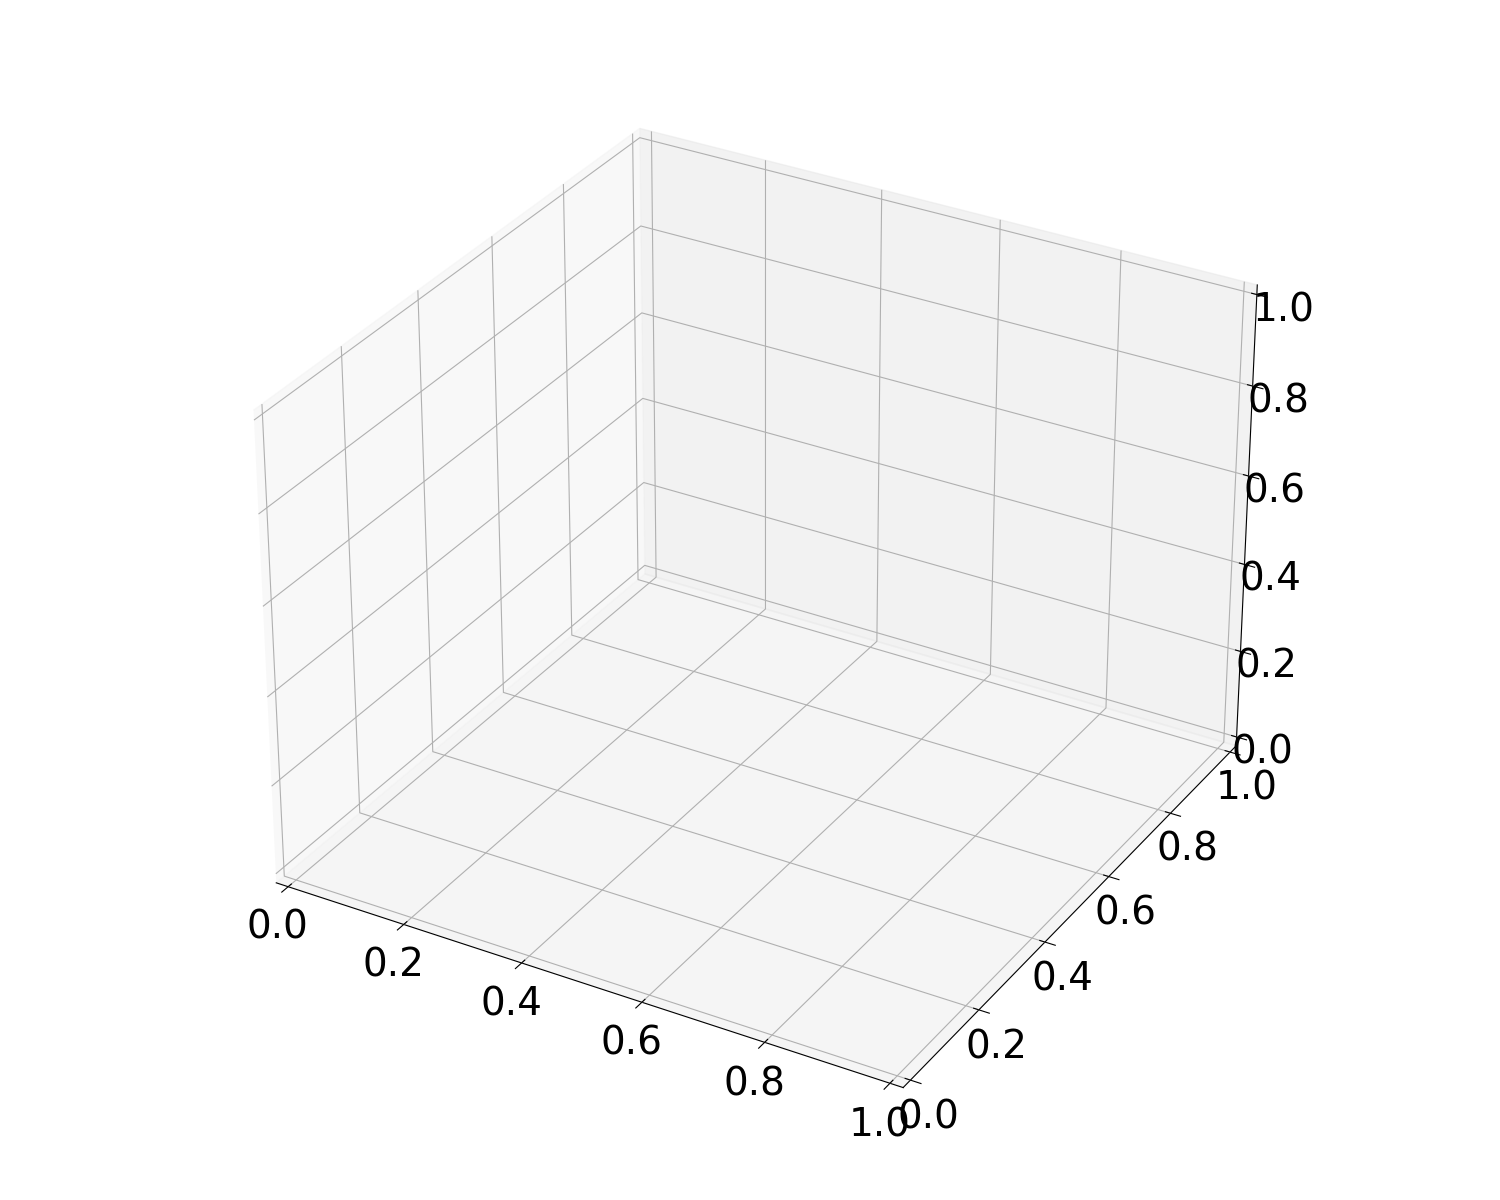

In [22]:
event_id_to_plot = 8
fig, ax = event_display.plot_event_3d(event_id_to_plot, color_label="Charge", title=f"Event #{event_id_to_plot}", view_azimuth=-120, view_elevation=30)
fig, ax = event_display.plot_event_3d(event_id_to_plot, color_label="Charge", title=f"Event #{event_id_to_plot}", view_azimuth=-120, view_elevation=30, style="dark_background")

In [44]:
for i in range(10):
    print(event_display[8]["data"][:,i])

[-254.1516    -120.35555   -298.9495     966.4          1.6120163]
[-274.51434   296.44907    45.66896   969.3         6.765025]
[ 314.36832    240.7111    -246.29532    960.9          5.2744823]
[ 312.80917    248.94011   -247.85445    960.1          2.8024745]
[ 257.93286     16.457987  -302.73074    956.           1.5540448]
[ 2.4629532e+02 -1.6443657e-14 -3.1436832e+02  9.5629999e+02
  3.3225522e+00]
[-382.6846      51.525303   -92.68303    968.8          5.8353977]
[268.0113   128.58455  292.65234  979.1        1.122766]
[ 278.4171    292.47195  -149.58636   959.8         7.199936]
[-263.75165     74.43081    296.912      999.5          1.2960725]


In [52]:
event_display[8]["data"][4]

array([1.6120163, 6.765025 , 5.2744823, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

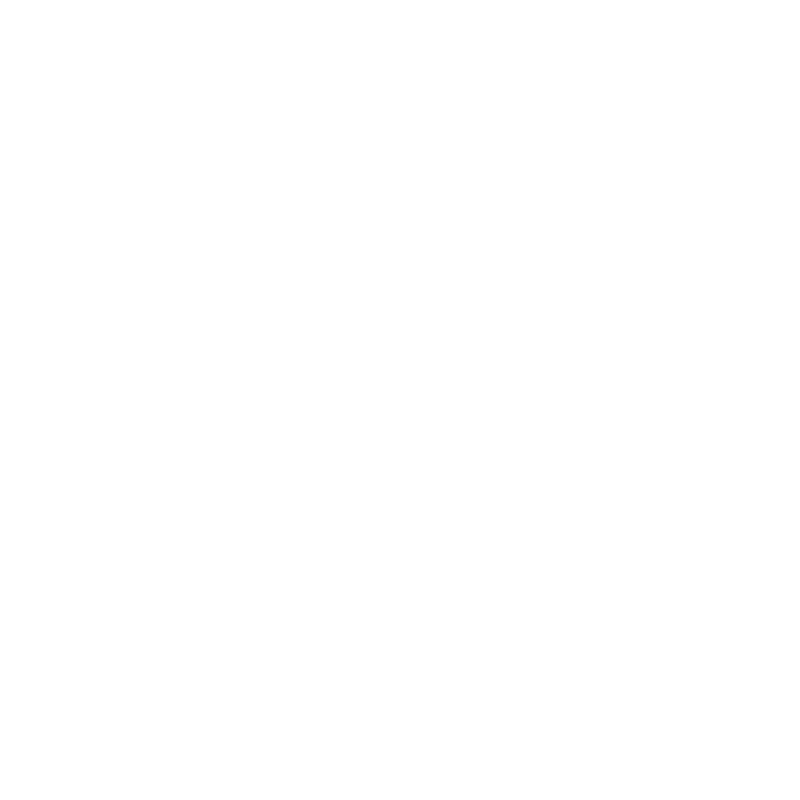

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.hist(event_display[8]["data"][4])
plt.clf()
plt.show()

## Using the HK Hybrid geometry instead

The version of the dataset used here only uses the 20" PMTs, so only those PMTs are shown. If using instead the version of the dataset designed for both 20" PMTs and mPMTs, using the corresponding data files, should display points for both PMT types.

In [ ]:
event_display = PointNetEventDisplay(h5file='/fast_scratch/WatChMaL/data/HKHybrid/e-mu-pi0_wo_mpmts_rename.hdf5',
                                     geometry_file='/fast_scratch/WatChMaL/data/HKHybrid/HKHybrid_wo_mpmts.geo.npz',
                                     is_distributed=False)

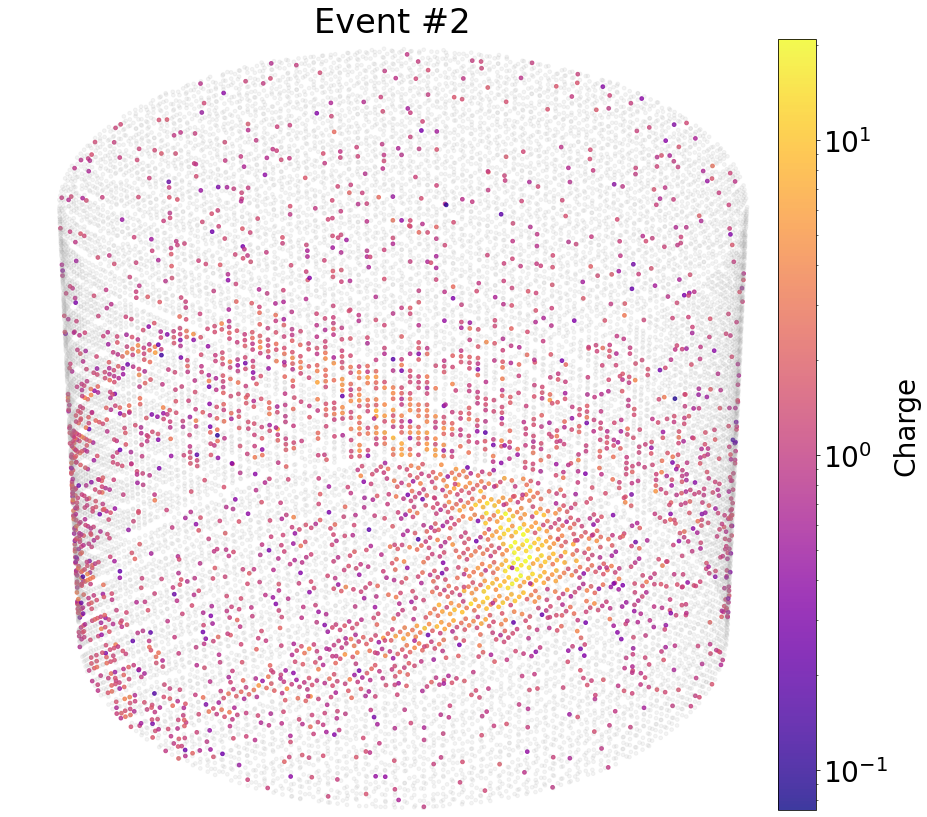

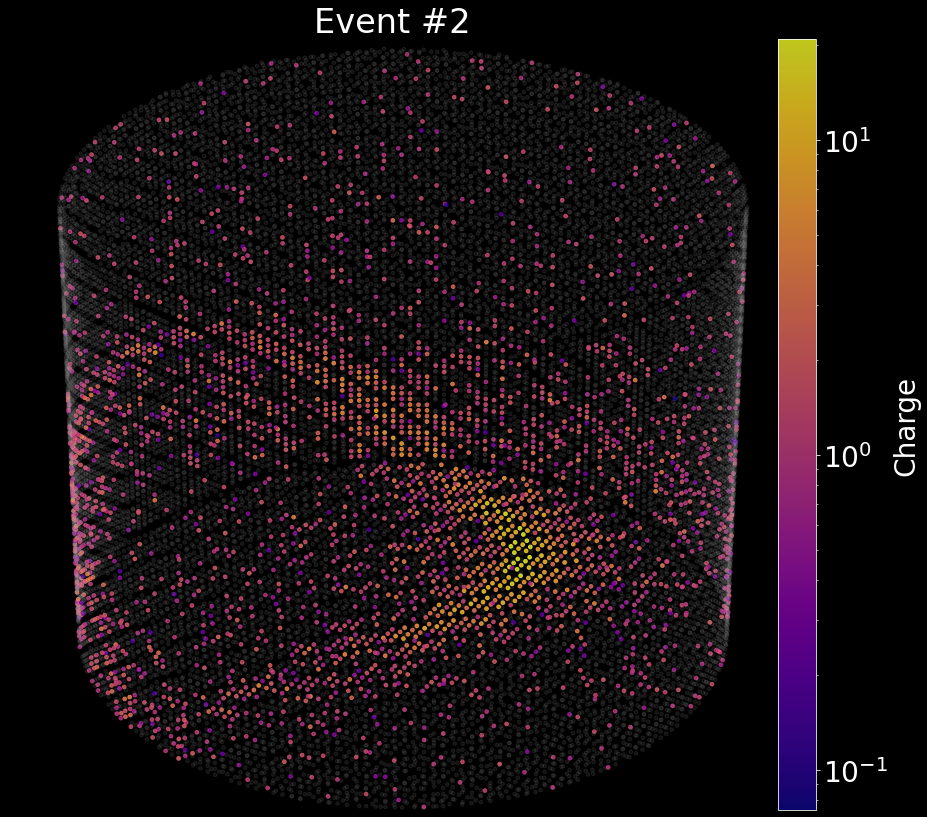

In [ ]:
event_id_to_plot = 2
fig, ax = event_display.plot_event_3d(event_id_to_plot, color_label="Charge", title=f"Event #{event_id_to_plot}", vertical_axis='z', view_azimuth=120, view_elevation=30)
fig, ax = event_display.plot_event_3d(event_id_to_plot, color_label="Charge", title=f"Event #{event_id_to_plot}", vertical_axis='z', view_azimuth=120, view_elevation=30, style="dark_background")